In [1]:
import numpy as np
from keras.datasets import imdb
np.random.seed(3)
(X_train, y_train), (X_test, y_test) = imdb.load_data(seed=15)

Using TensorFlow backend.


Review length: 


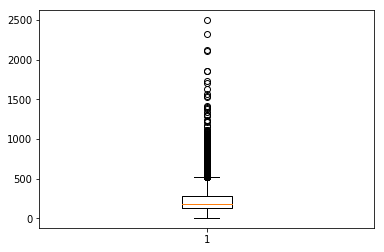

In [2]:
X = np.concatenate((X_train, X_test), axis=0)
y = np.concatenate((y_train, y_test), axis=0)
from matplotlib import pyplot
print("Review length: ")
result = map(len, X)
pyplot.boxplot(result)
pyplot.show()

In [2]:
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=3000, seed=15)
from keras.preprocessing import sequence
X_train = sequence.pad_sequences(X_train, maxlen=500)
X_test = sequence.pad_sequences(X_test, maxlen=500)

In [3]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers.embeddings import Embedding


def generate_model(top_words, embedding_length, n_lstm_units=100, dropout=None):
    model = Sequential()
    model.add(Embedding(top_words, embedding_length, input_length=500))
    if dropout is not None:
        model.add(Dropout(dropout))
    model.add(LSTM(n_lstm_units))
    if dropout is not None:
        model.add(Dropout(dropout))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model


In [ ]:
import h5py
from keras.models import load_model
model = generate_model(top_words=3000, embedding_length=32, n_lstm_units=100)
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 500, 32)           96000     
_________________________________________________________________
lstm_1 (LSTM)                (None, 100)               53200     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 101       
Total params: 149,301
Trainable params: 149,301
Non-trainable params: 0
_________________________________________________________________


In [42]:
hist = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=3, batch_size=64)
model.save('lstm100_embedding32.h5')
model.save('lstm100_topWord3000.h5')
#scores = model.evaluate(X_test, y_test, verbose=1)

Train on 25000 samples, validate on 25000 samples
Epoch 1/3
25000/25000 [==============================] - 746s - loss: 0.4933 - acc: 0.7567 - val_loss: 0.3580 - val_acc: 0.8494
Epoch 2/3
25000/25000 [==============================] - 622s - loss: 0.3177 - acc: 0.8706 - val_loss: 0.3992 - val_acc: 0.8584
Epoch 3/3
25000/25000 [==============================] - 621s - loss: 0.3141 - acc: 0.8694 - val_loss: 0.3167 - val_acc: 0.8691


In [43]:
scores = model.evaluate(X_test, y_test, verbose=0)
print('Test loss: {0}'.format(scores[0]))
print('Test accuracy: {0}'.format(scores[1]))

Test loss: 0.316668782351
Test accuracy: 0.86912


In [ ]:
embedding_lengths = [128,512,1024]#falta 8

for length in embedding_lengths:
    model = generate_model(top_words=3000, embedding_length=length, n_lstm_units=100)
    # fitting the model
    hist = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=3, batch_size=64)
    # saving the model
    model.save('lstm100_embedding'+str(length)+'.h5')

Train on 25000 samples, validate on 25000 samples
Epoch 1/3
25000/25000 [==============================] - 1000s - loss: 0.4907 - acc: 0.7606 - val_loss: 0.3796 - val_acc: 0.8384
Epoch 2/3
25000/25000 [==============================] - 752s - loss: 0.3234 - acc: 0.8675 - val_loss: 0.2993 - val_acc: 0.8736
Epoch 3/3
25000/25000 [==============================] - 809s - loss: 0.2725 - acc: 0.8928 - val_loss: 0.3131 - val_acc: 0.8739
Train on 25000 samples, validate on 25000 samples
Epoch 1/3
25000/25000 [==============================] - 2178s - loss: 0.4793 - acc: 0.7638 - val_loss: 0.4006 - val_acc: 0.8198
Epoch 2/3
22400/25000 [=========================>....] - ETA: 326s - loss: 0.3527 - acc: 0.8529

In [ ]:
top_words = [1000,2000,4000,5000]

for length in top_words:
    model = generate_model(top_words=length, embedding_length=32, n_lstm_units=100)
    # fitting the model
    hist = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=3, batch_size=64)
    # saving the model
    model.save('lstm100_topWord'+str(length)+'.h5')

In [ ]:
model = generate_model(top_words=3000, embedding_length=32, n_lstm_units=100, dropout=0.2 )
model.summary()

In [ ]:
hist = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=3, batch_size=64)
model.save('lstm100_dropout02.h5')